# QSS20 Project 
Covid-19 twitter sentimate analysis

## Total sentimate analysis for states

Starting to look into specifics - new code

Looking into state by state difference in overall negative / positive tweets

In [1]:
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer



# # Double check to ensure NLTK resources are downloaded
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

# Set display option 
# This to show the full text in the output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# This is to stop the error messages
pd.options.mode.chained_assignment = None

In [2]:
# Load the data frame from the pickle file and display the first few rows
file_path = '/Users/alexwitheiler/Desktop/QSS20/project/covid_sample-0.0001.pkl'
tweets = pd.read_pickle(file_path)


In [3]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase text
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
tweets['clean_text'] = tweets['text'].apply(lambda x: preprocess_text(str(x)))

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the cleaned text
tweets['sentiment'] = tweets['clean_text'].apply(lambda x: get_sentiment_score(x))

# Extract sentiment compound score for comparison
tweets['sentiment_score'] = tweets['sentiment'].apply(lambda x: x['compound'])

# Separate data by state
tweets_by_state = tweets.dropna(subset=['state'])

# Group by state and calculate average sentiment score
state_sentiment = tweets_by_state.groupby('state')['sentiment_score'].mean().reset_index()

# Sort states by sentiment score
state_sentiment = state_sentiment.sort_values(by='sentiment_score', ascending=False)

# Display the results
print(state_sentiment)


   state  sentiment_score
6     CT         0.057024
10    GA         0.038497
7     DC         0.036769
40    SC         0.028029
15    IN         0.025412
19    MA         0.023833
25    MS         0.023086
1     AL         0.020071
45    VA         0.012841
0     AK         0.011390
28    ND         0.011088
2     AR         0.009232
20    MD         0.007711
3     AZ         0.006548
14    IL         0.005540
16    KS         0.005172
35    OH         0.004895
37    OR         0.000967
29    NE         0.000661
34    NY        -0.000949
47    WA        -0.002225
27    NC        -0.003806
4     CA        -0.005941
5     CO        -0.007902
33    NV        -0.009403
32    NM        -0.010986
30    NH        -0.012019
31    NJ        -0.012098
38    PA        -0.013503
48    WI        -0.017359
42    TN        -0.017361
39    RI        -0.019720
21    ME        -0.021909
49    WV        -0.024604
43    TX        -0.025463
50    WY        -0.025532
17    KY        -0.026827
24    MO    

Above, we see the overall sentimate and attidue of each state in each tweet, without filtering for key words. Lets continue to understand the overall comparisions and magnitude in order to contextualize state by state differences in mental healht attiude with the overall sentimate of the stae. We need to know this; if a state has very high negative sentimate in general, it makes sense that the state would have larger negative scores specific to covid -- this code helps contextualize those results and shows which states in general tweet more negative or positive things

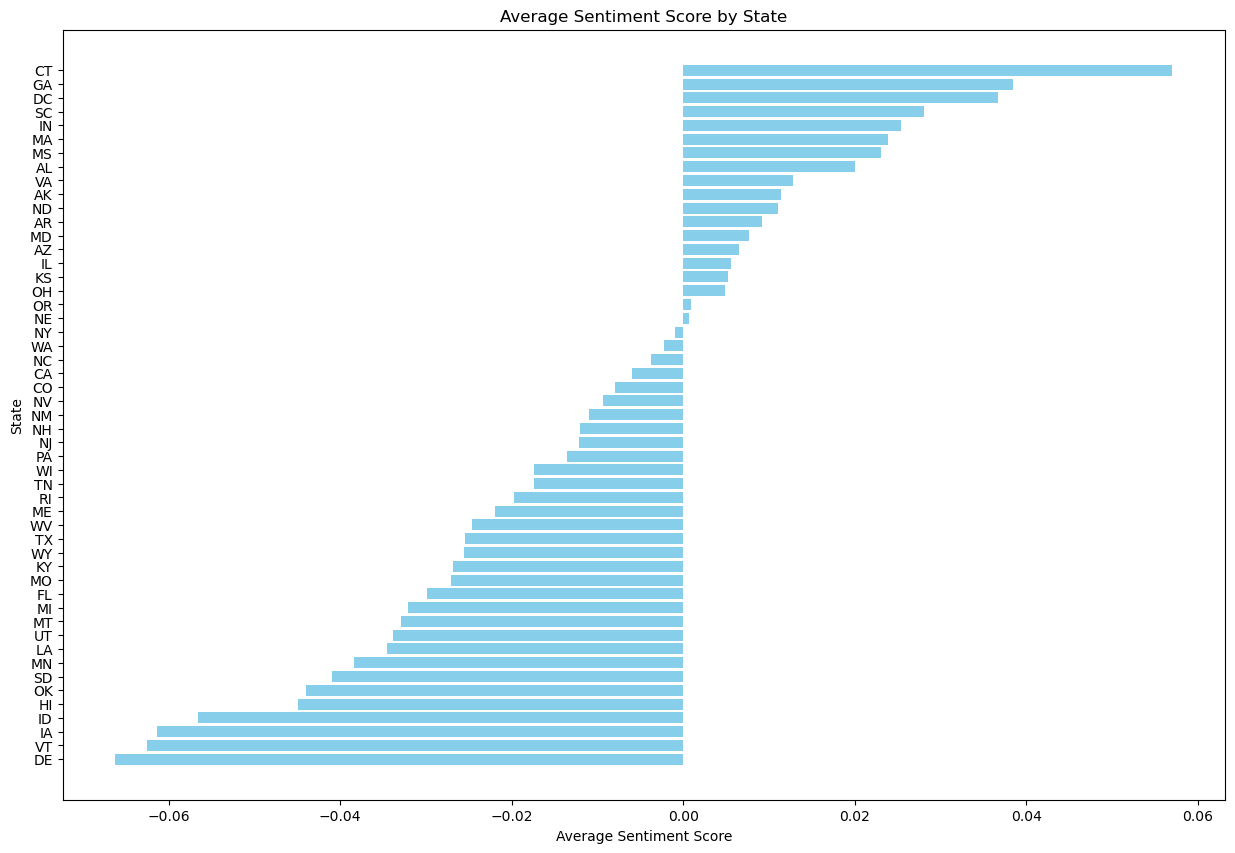

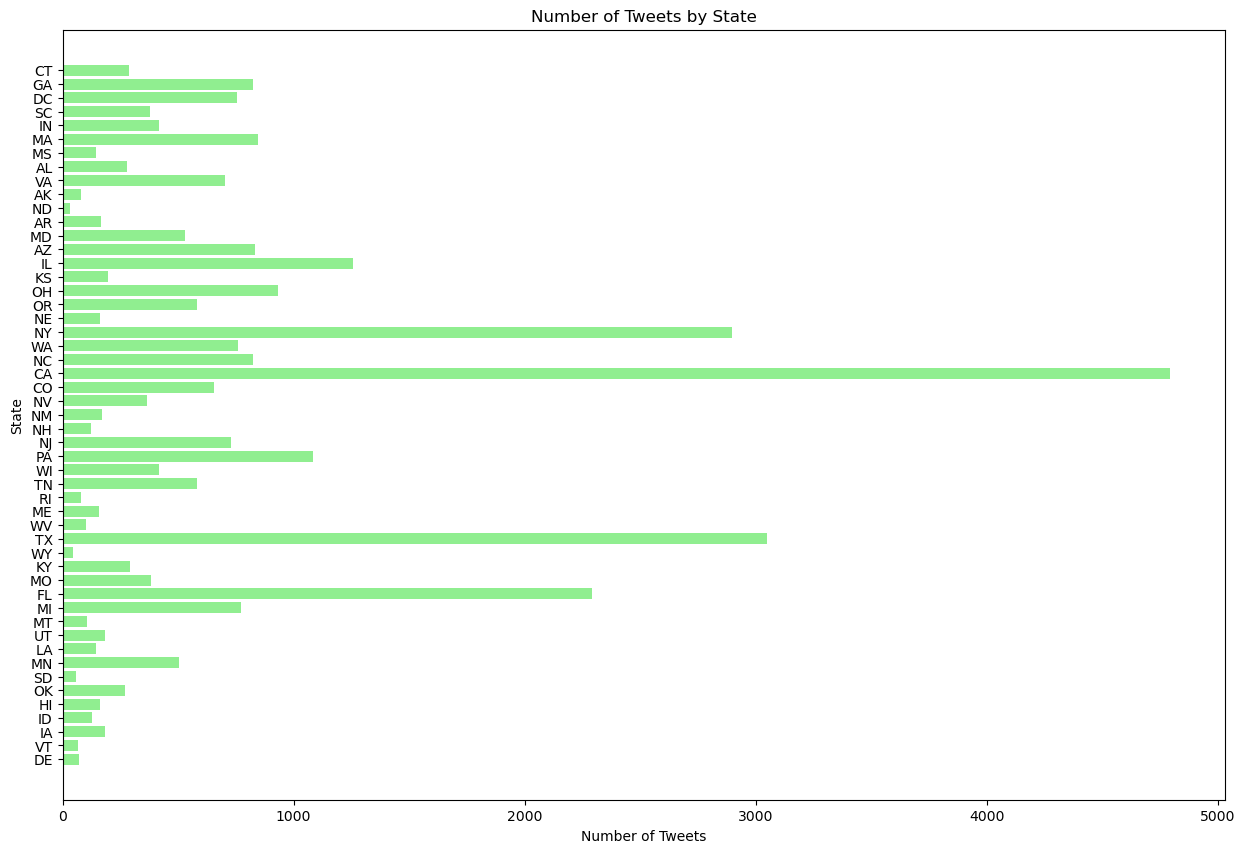

State with the most positive sentiment: CT (Score: 0.05702361111111111)
State with the most negative sentiment: DE (Score: -0.0662068493150685)


In [4]:
# Count the number of tweets per state
tweets_count_by_state = tweets_by_state['state'].value_counts().reset_index()
tweets_count_by_state.columns = ['state', 'tweet_count']

# Merge the average sentiment scores with the tweet counts
state_sentiment = state_sentiment.merge(tweets_count_by_state, on='state')

# Plot average sentiment scores by state
plt.figure(figsize=(15, 10))
plt.barh(state_sentiment['state'], state_sentiment['sentiment_score'], color='skyblue')
plt.xlabel('Average Sentiment Score')
plt.ylabel('State')
plt.title('Average Sentiment Score by State')
plt.gca().invert_yaxis()
plt.show()

# Plot number of tweets by state
plt.figure(figsize=(15, 10))
plt.barh(state_sentiment['state'], state_sentiment['tweet_count'], color='lightgreen')
plt.xlabel('Number of Tweets')
plt.ylabel('State')
plt.title('Number of Tweets by State')
plt.gca().invert_yaxis()
plt.show()

# Highlight states with the most positive and negative average sentiments
most_positive_state = state_sentiment.iloc[state_sentiment['sentiment_score'].idxmax()]
most_negative_state = state_sentiment.iloc[state_sentiment['sentiment_score'].idxmin()]

print(f"State with the most positive sentiment: {most_positive_state['state']} (Score: {most_positive_state['sentiment_score']})")
print(f"State with the most negative sentiment: {most_negative_state['state']} (Score: {most_negative_state['sentiment_score']})")


In [5]:
state_sentiment # For more contextualization

,state,sentiment_score,tweet_count
0,CT,0.057024,288
1,GA,0.038497,826
2,DC,0.036769,757
3,SC,0.028029,377
4,IN,0.025412,418
5,MA,0.023833,847
6,MS,0.023086,146
7,AL,0.020071,278
8,VA,0.012841,701
9,AK,0.011390,82


Now let's begin to look into subseted tweets that relate to mental health - add or remove words depending on what we think is most important as key words in a tweet.

In [6]:
# Define mental health-related keywords
mental_health_keywords = [
    'mental health', 'depression', 'anxiety', 'stress', 'therapy', 'counseling',
    'mental illness', 'wellbeing', 'psychological', 'psychiatrist', 'psychologist',
    'mental disorder', 'mental wellbeing', 'mental wellness', 'mental health support'
]


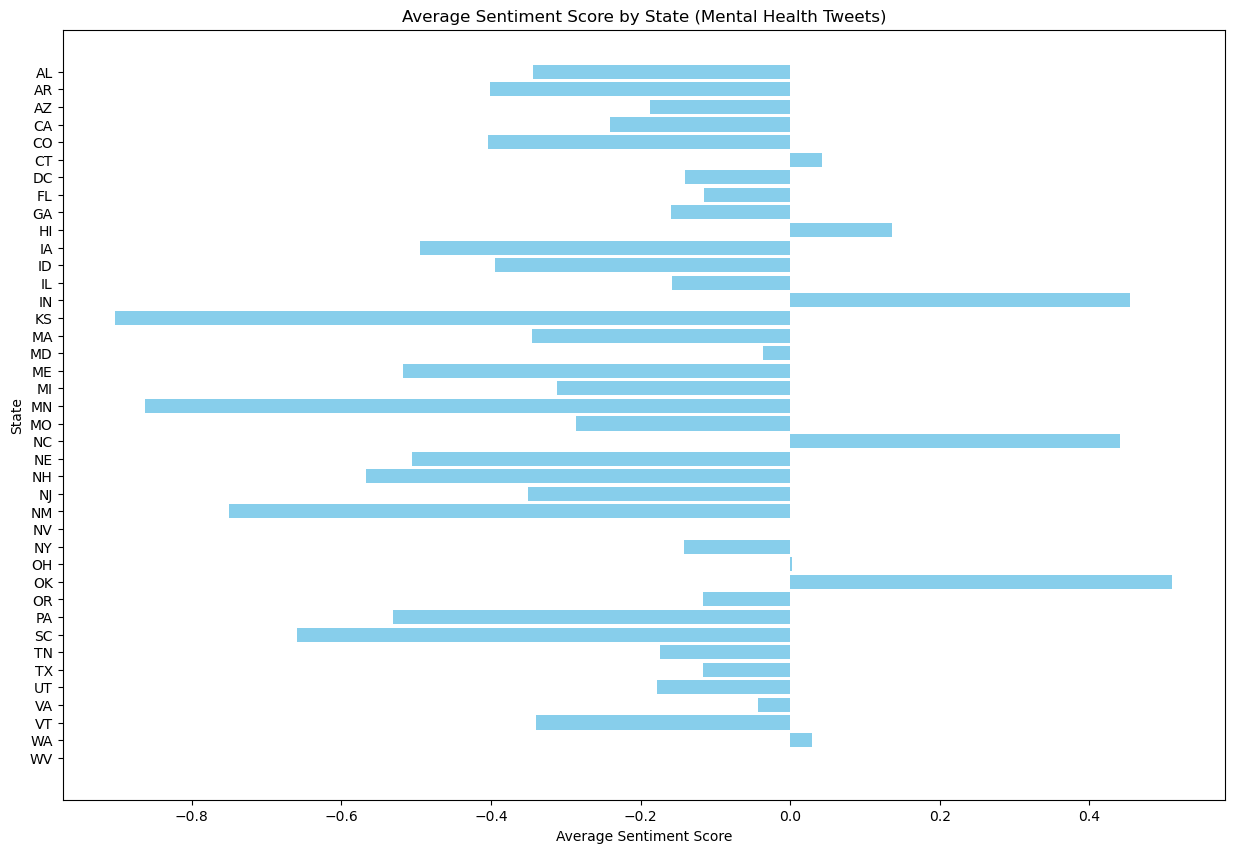

State with the most positive sentiment (Mental Health): OK (Score: 0.5106)
State with the most negative sentiment (Mental Health): KS (Score: -0.9022)


In [7]:
# Filter tweets that contain any of the mental health keywords
def contains_mental_health_keyword(text):
    return any(keyword in text for keyword in mental_health_keywords)

# Apply the filter to create a subset of tweets related to mental health
mental_health_tweets = tweets[tweets['clean_text'].apply(lambda x: contains_mental_health_keyword(str(x)))]

# Perform sentiment analysis on the mental health subset
mental_health_tweets['sentiment'] = mental_health_tweets['clean_text'].apply(lambda x: get_sentiment_score(x))
mental_health_tweets['sentiment_score'] = mental_health_tweets['sentiment'].apply(lambda x: x['compound'])

# Separate data by state for mental health tweets
mental_health_tweets_by_state = mental_health_tweets.dropna(subset=['state'])

# Group by state and calculate average sentiment score for mental health tweets
state_mental_health_sentiment = mental_health_tweets_by_state.groupby('state')['sentiment_score'].mean().reset_index()

# Count the number of mental health tweets per state
mental_health_tweets_count_by_state = mental_health_tweets_by_state['state'].value_counts().reset_index()
mental_health_tweets_count_by_state.columns = ['state', 'tweet_count']

# Merge the average sentiment scores with the tweet counts for mental health tweets
state_mental_health_sentiment = state_mental_health_sentiment.merge(mental_health_tweets_count_by_state, on='state')

# Plot average sentiment scores by state for mental health tweets
plt.figure(figsize=(15, 10))
plt.barh(state_mental_health_sentiment['state'], state_mental_health_sentiment['sentiment_score'], color='skyblue')
plt.xlabel('Average Sentiment Score')
plt.ylabel('State')
plt.title('Average Sentiment Score by State (Mental Health Tweets)')
plt.gca().invert_yaxis()
plt.show()

# # Plot number of mental health tweets by state -- only run this for more contextualization 
# plt.figure(figsize=(15, 10))
# plt.barh(state_mental_health_sentiment['state'], state_mental_health_sentiment['tweet_count'], color='lightgreen')
# plt.xlabel('Number of Tweets')
# plt.ylabel('State')
# plt.title('Number of Mental Health Tweets by State')
# plt.gca().invert_yaxis()
# plt.show()

# Highlight states with the most positive and negative average sentiments for mental health tweets
most_positive_state_mental_health = state_mental_health_sentiment.iloc[state_mental_health_sentiment['sentiment_score'].idxmax()]
most_negative_state_mental_health = state_mental_health_sentiment.iloc[state_mental_health_sentiment['sentiment_score'].idxmin()]

print(f"State with the most positive sentiment (Mental Health): {most_positive_state_mental_health['state']} (Score: {most_positive_state_mental_health['sentiment_score']})")
print(f"State with the most negative sentiment (Mental Health): {most_negative_state_mental_health['state']} (Score: {most_negative_state_mental_health['sentiment_score']})")


Now lets compares the overall negative tweets per state with the negative tweets specific to mental health

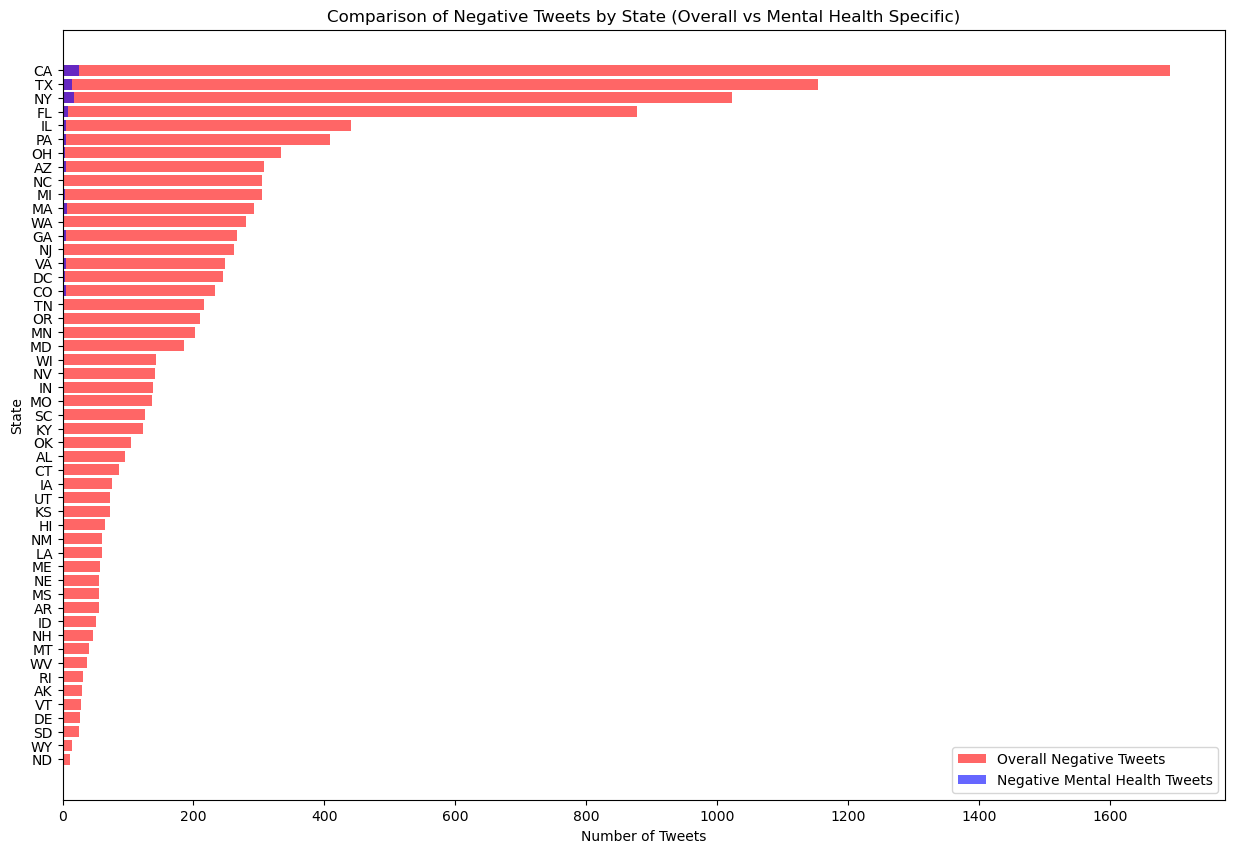

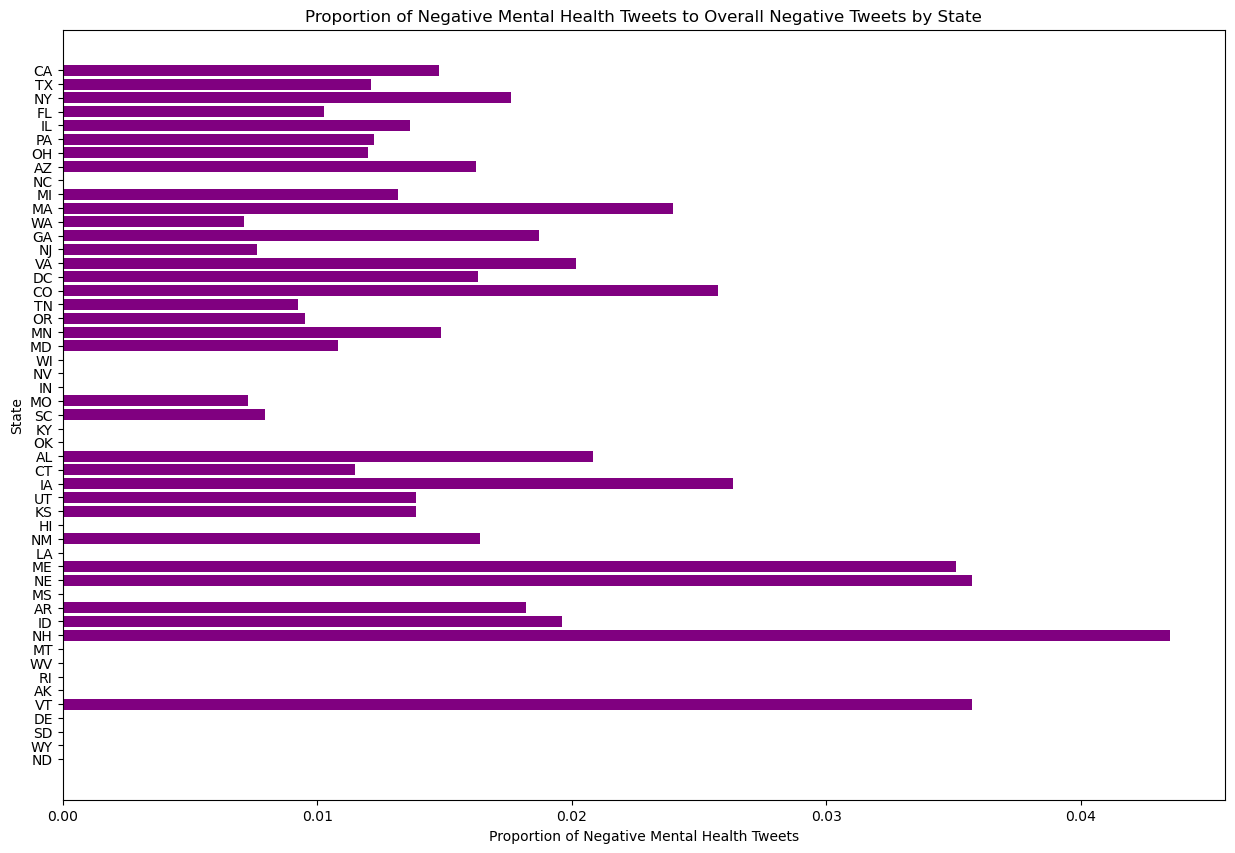

In [8]:
# Filter for negative tweets (overall and mental health specific)
negative_tweets = tweets[tweets['sentiment_score'] < 0]
negative_mental_health_tweets = mental_health_tweets[mental_health_tweets['sentiment_score'] < 0]

# Count the number of negative tweets per state (overall)
negative_tweets_by_state = negative_tweets.dropna(subset=['state'])
negative_tweets_count_by_state = negative_tweets_by_state['state'].value_counts().reset_index()
negative_tweets_count_by_state.columns = ['state', 'negative_tweet_count']

# Count the number of negative mental health tweets per state
negative_mental_health_tweets_by_state = negative_mental_health_tweets.dropna(subset=['state'])
negative_mental_health_tweets_count_by_state = negative_mental_health_tweets_by_state['state'].value_counts().reset_index()
negative_mental_health_tweets_count_by_state.columns = ['state', 'negative_mental_health_tweet_count']

# Merge the negative tweet counts
negative_comparison = negative_tweets_count_by_state.merge(negative_mental_health_tweets_count_by_state, on='state', how='outer')
negative_comparison.fillna(0, inplace=True)

# Calculate the proportion of negative mental health tweets to overall negative tweets
negative_comparison['proportion_negative_mental_health'] = (
    negative_comparison['negative_mental_health_tweet_count'] / negative_comparison['negative_tweet_count']
)

# Display the comparison
# print(negative_comparison)

# Plot comparison of negative tweets (overall vs mental health specific)
plt.figure(figsize=(15, 10))
plt.barh(negative_comparison['state'], negative_comparison['negative_tweet_count'], color='red', alpha=0.6, label='Overall Negative Tweets')
plt.barh(negative_comparison['state'], negative_comparison['negative_mental_health_tweet_count'], color='blue', alpha=0.6, label='Negative Mental Health Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('State')
plt.title('Comparison of Negative Tweets by State (Overall vs Mental Health Specific)')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# Plot the proportion of negative mental health tweets to overall negative tweets
plt.figure(figsize=(15, 10))
plt.barh(negative_comparison['state'], negative_comparison['proportion_negative_mental_health'], color='purple')
plt.xlabel('Proportion of Negative Mental Health Tweets')
plt.ylabel('State')
plt.title('Proportion of Negative Mental Health Tweets to Overall Negative Tweets by State')
plt.gca().invert_yaxis()
plt.show()


Above we can see which states have overall tweets that are negative, but not related to mental health and compare those to states where the amount of negative tweets about mental health is higher then overall negative tweets in general

Instead, lets control for the population of a state / the number of tweets for a more accurate understanding

In [11]:
# Count the total number of tweets per state (overall)
total_tweets_count_by_state = tweets_by_state['state'].value_counts().reset_index()
total_tweets_count_by_state.columns = ['state', 'total_tweet_count']

# Count the total number of mental health tweets per state
total_mental_health_tweets_count_by_state = mental_health_tweets_by_state['state'].value_counts().reset_index()
total_mental_health_tweets_count_by_state.columns = ['state', 'total_mental_health_tweet_count']

In [13]:
# Calculate the proportion of negative tweets to total tweets per state (overall)
negative_tweets_proportion_by_state = negative_tweets_count_by_state.merge(total_tweets_count_by_state, on='state')
negative_tweets_proportion_by_state['negative_tweet_proportion'] = (
    negative_tweets_proportion_by_state['negative_tweet_count'] / negative_tweets_proportion_by_state['total_tweet_count']
)

# Calculate the proportion of negative mental health tweets to total mental health tweets per state
negative_mental_health_tweets_proportion_by_state = negative_mental_health_tweets_count_by_state.merge(total_mental_health_tweets_count_by_state, on='state')
negative_mental_health_tweets_proportion_by_state['negative_mental_health_tweet_proportion'] = (
    negative_mental_health_tweets_proportion_by_state['negative_mental_health_tweet_count'] / negative_mental_health_tweets_proportion_by_state['total_mental_health_tweet_count']
)

# Merge the proportions
negative_proportion_comparison = negative_tweets_proportion_by_state[['state', 'negative_tweet_proportion']].merge(
    negative_mental_health_tweets_proportion_by_state[['state', 'negative_mental_health_tweet_proportion']], on='state', how='outer'
)
negative_proportion_comparison.fillna(0, inplace=True)

# Display the comparison
# print(negative_proportion_comparison)

In [ ]:
# Plot comparison of negative tweet proportions (overall vs mental health specific)
plt.figure(figsize=(15, 10))

# Plot overall negative tweet proportion
plt.barh(negative_proportion_comparison['state'], negative_proportion_comparison['negative_tweet_proportion'], color='red', alpha=0.6, label='Overall Negative Tweet Proportion')

# Plot negative mental health tweet proportion on the same axis
plt.barh(negative_proportion_comparison['state'], negative_proportion_comparison['negative_mental_health_tweet_proportion'], color='blue', alpha=0.6, label='Negative Mental Health Tweet Proportion')

plt.xlabel('Proportion of Negative Tweets')
plt.ylabel('State')
plt.title('Comparison of Negative Tweet Proportions by State (Overall vs Mental Health Specific)')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

By comparing the lengths of the red and blue bars for each state, you can see how the proportion of negative tweets about mental health compares to the overall proportion of negative tweets.
For many states, the blue bars (negative mental health tweet proportions) are longer than the red bars (overall negative tweet proportions), indicating a higher proportion of negative sentiment in tweets related to mental health.

Insights:

Disparities: States where the blue bars are significantly longer than the red bars indicate a disparity where negative sentiment in mental health tweets is higher than the overall negative sentiment.

Uniformity: States where the lengths of the red and blue bars are similar suggest that the negative sentiment in mental health tweets is comparable to the overall negative sentiment.



Key Observations:

High Mental Health Negative Sentiment: States like MA, WA, GA, and NJ have significantly longer blue bars compared to red bars, indicating a high proportion of negative sentiment in mental health tweets.
Lower Mental Health Negative Sentiment: Some states like LA, VT, and AK have shorter blue bars compared to red bars, indicating relatively lower negative sentiment in mental health tweets compared to overall negative sentiment.


What are the biggest negative mental health words?

Most Common Negative Words in Mental Health Tweets:
pandemic: 205
mental: 201
covid: 188
health: 183
anxiety: 174
stress: 166
depression: 161
people: 105
covid19: 61
lockdown: 60
amp: 55
us: 45
many: 40
due: 39
illness: 38
im: 37
time: 36
students: 34
like: 33
crisis: 30


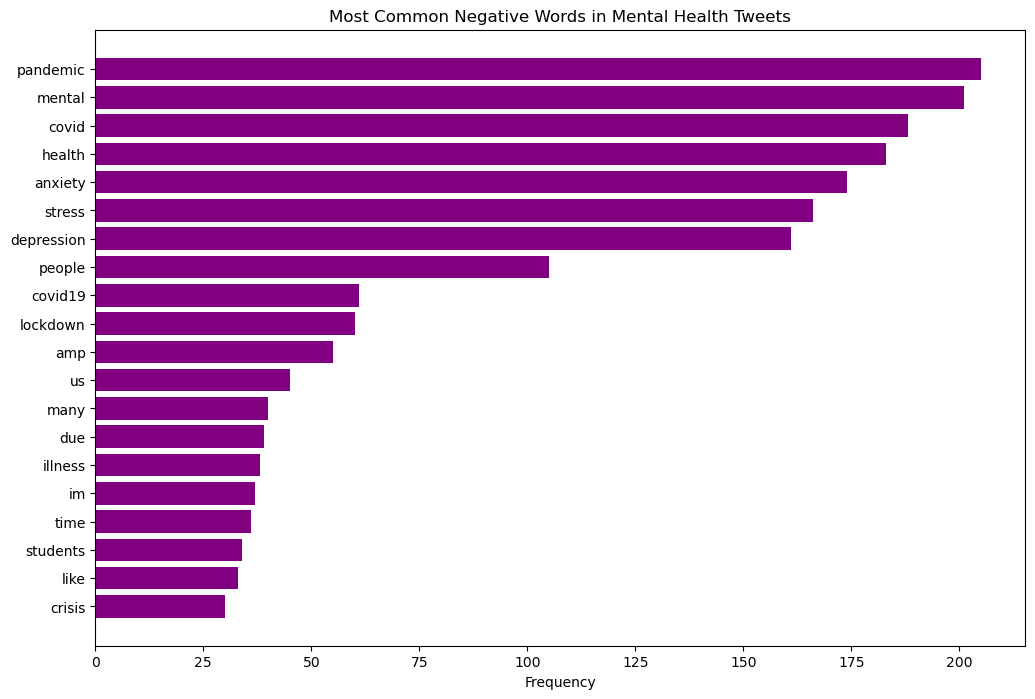

In [14]:
# Filter the subset of mental health tweets for negative sentiment
negative_mental_health_tweets = mental_health_tweets[mental_health_tweets['sentiment_score'] < 0]

# Define a function to tokenize text and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word != 'rt']
    return tokens

# Tokenize the text of negative mental health tweets and remove stopwords
negative_mental_health_tweets['tokens'] = negative_mental_health_tweets['clean_text'].apply(lambda x: tokenize_and_remove_stopwords(str(x)))

# Flatten the list of tokens and count the frequency of each word
all_negative_words = [word for tokens in negative_mental_health_tweets['tokens'] for word in tokens]
word_counts = Counter(all_negative_words)

# Get the most common negative words
most_common_negative_words = word_counts.most_common(20)

# Display the most common negative words
print("Most Common Negative Words in Mental Health Tweets:")
for word, count in most_common_negative_words:
    print(f"{word}: {count}")

# Plot the most common negative words
words, counts = zip(*most_common_negative_words)
plt.figure(figsize=(12, 8))
plt.barh(words, counts, color='purple')
plt.xlabel('Frequency')
plt.title('Most Common Negative Words in Mental Health Tweets')
plt.gca().invert_yaxis()
plt.show()


Here we see intersting results about what mental health words are key in negative texts. It reveals that words like health were more important then stresor depression, which seems to show that people are worried about overall health more then mental health


Most Common Negative Words in Mental Health Tweets for CA:
pandemic: 8
anxiety: 8
mental: 7
covid: 6
health: 6
depression: 5
people: 5
amp: 4
stress: 4
kids: 3

Most Common Negative Words in Mental Health Tweets for TX:
anxiety: 6
mental: 5
health: 5
covid: 5
pandemic: 4
depression: 4
stress: 4
going: 3
im: 3
lockdown: 2

Most Common Negative Words in Mental Health Tweets for NY:
covid: 8
pandemic: 8
health: 6
anxiety: 5
mental: 4
stress: 4
depression: 4
people: 3
current: 2
us: 2


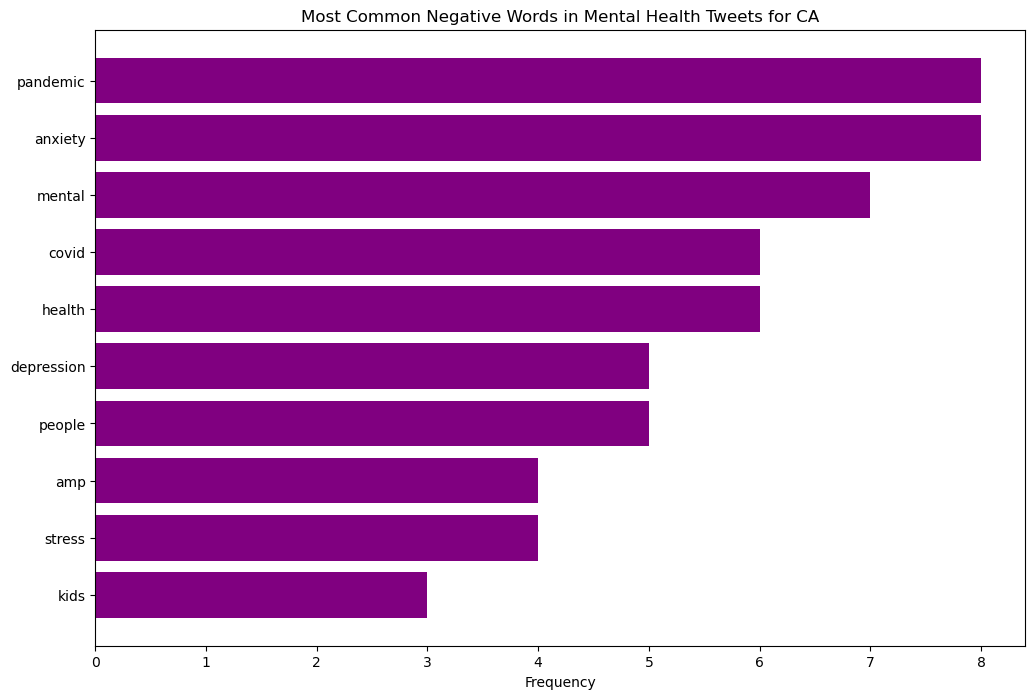

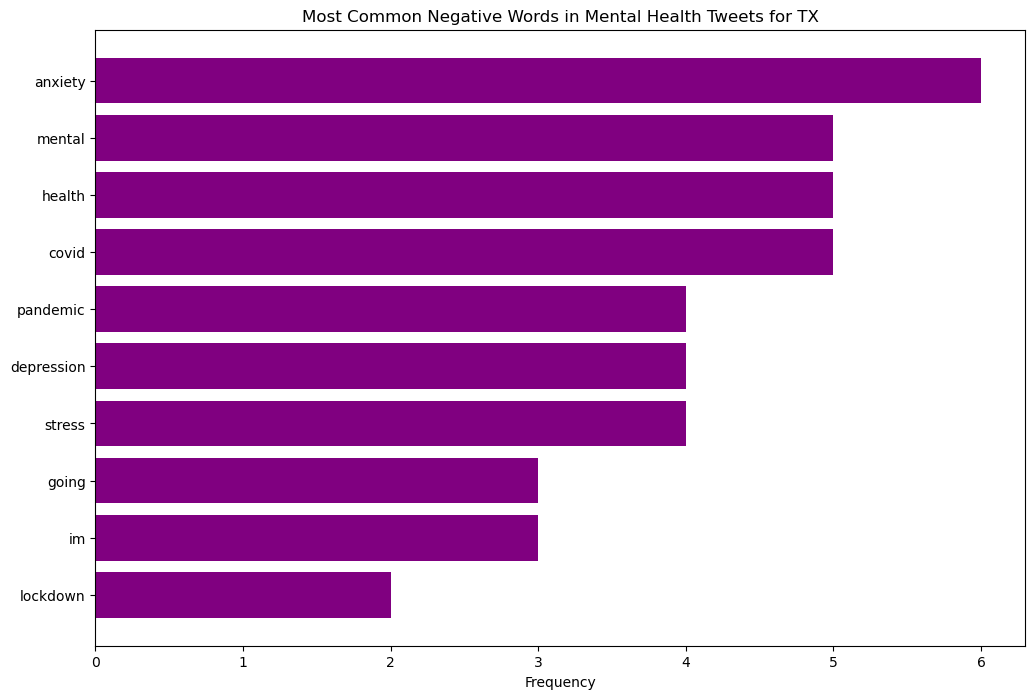

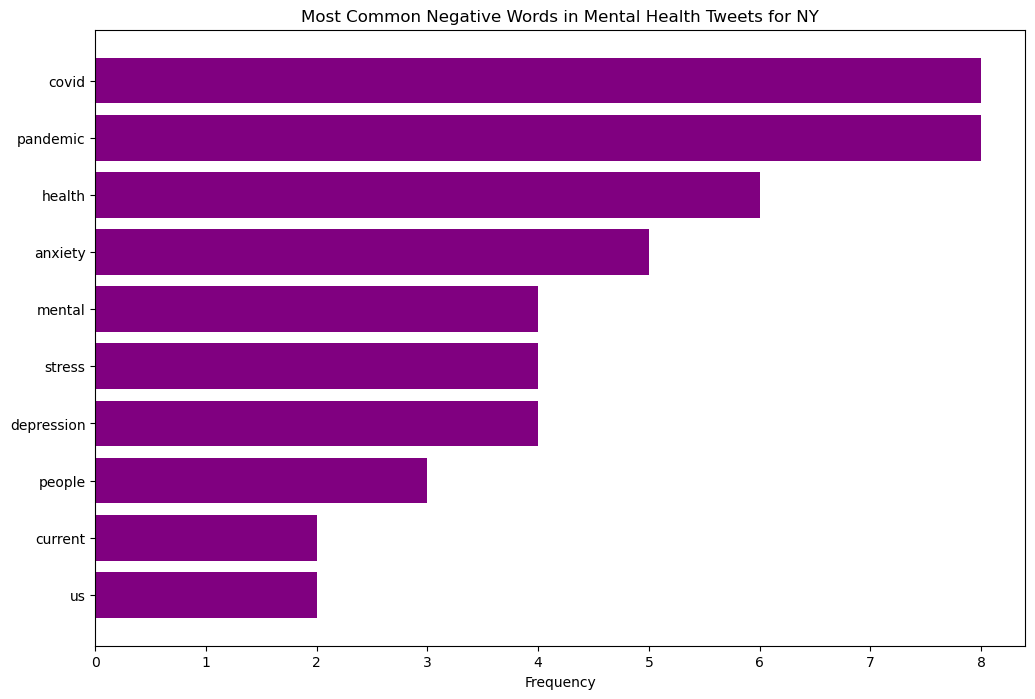

In [15]:
# Create a dictionary to store word counts for each state
state_negative_word_counts = defaultdict(Counter)

# Iterate through each state
for state in negative_mental_health_tweets_by_state['state'].unique():
    # Filter tweets for the current state
    state_tweets = negative_mental_health_tweets_by_state[negative_mental_health_tweets_by_state['state'] == state]
    
    # Tokenize the text and remove stopwords, including "rt"
    state_tweets['tokens'] = state_tweets['clean_text'].apply(lambda x: tokenize_and_remove_stopwords(str(x)))
    
    # Flatten the list of tokens and count the frequency of each word
    all_negative_words_state = [word for tokens in state_tweets['tokens'] for word in tokens]
    word_counts_state = Counter(all_negative_words_state)
    
    # Store the word counts for the state
    state_negative_word_counts[state] = word_counts_state

# Display the most common negative words for a few example states
example_states = ['CA', 'TX', 'NY']  # Replace with any states of interest

for state in example_states:
    print(f"\nMost Common Negative Words in Mental Health Tweets for {state}:")
    most_common_negative_words_state = state_negative_word_counts[state].most_common(10)
    for word, count in most_common_negative_words_state:
        print(f"{word}: {count}")

# Visualize the most common negative words for selected states
for state in example_states:
    most_common_negative_words_state = state_negative_word_counts[state].most_common(10)
    words, counts = zip(*most_common_negative_words_state)
    
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color='purple')
    plt.xlabel('Frequency')
    plt.title(f'Most Common Negative Words in Mental Health Tweets for {state}')
    plt.gca().invert_yaxis()
    plt.show()


Above, we can see what specific words are used per state. Let's see what specific words have the biggest state by state variance.

# Run for the bigger file

Storage and origonal exploring of the bigger data

In [ ]:
# # Load the data from the pickle file
# file_path2 = '/Users/alexwitheiler/Desktop/QSS20/project/covid_sample-0.001.pkl'
# all_tweets = pd.read_pickle(file_path2)

# # Display the first few rows of the dataframe
# all_tweets



# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# # Filter tweets that are in English
# english_tweets = all_tweets[all_tweets['lang'] == 'en']

## ... run the same code but with the new all_tweets data that is larger

## Extras

## Notes

for the NaN -- depends if relevent, but you can drop them for this data
first question is what NaN -- not applicable -- look at the columns to determin if it is relvent
is it a missing value? you may want to impute with the mean 
or is an inrelevent column


Storage information, if applicable

In [ ]:
## Imports 
import pandas as pd
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Set display option to show the full text in the output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)



# Path to the smaller file 
file_path = '/Users/alexwitheiler/Desktop/QSS20/project/covid_sample-0.0001.pkl'

# Load the data frame from the pickle file and display the first few rows
tweets = pd.read_pickle(file_path)


# Display the columns of the dataframe
print(tweets.columns)

# Display the first few rows of the dataframe
print(tweets.head())


## OUTPUT
# Index(['tweetid', 'userid', 'screen_name', 'date', 'lang', 'location',
#        'place_id', 'place_url', 'place_type', 'place_name', 'place_full_name',
#        'place_country_code', 'place_country', 'place_bounding_box', 'text',
#        'extended', 'coord', 'reply_userid', 'reply_screen', 'reply_statusid',
#        'tweet_type', 'friends_count', 'listed_count', 'followers_count',
#        'favourites_count', 'statuses_count', 'verified', 'hashtag',
#        'urls_list', 'profile_pic_url', 'profile_banner_url', 'display_name',
#        'date_first_tweet', 'account_creation_date', 'rt_urls_list',
#        'mentionid', 'mentionsn', 'rt_screen', 'rt_userid', 'rt_text',
#        'rt_hashtag', 'rt_qtd_count', 'rt_rt_count', 'rt_reply_count',
#        'rt_fav_count', 'rt_tweetid', 'rt_location', 'qtd_screen', 'qtd_userid',
#        'qtd_text', 'qtd_hashtag', 'qtd_qtd_count', 'qtd_rt_count',
#        'qtd_reply_count', 'qtd_fav_count', 'qtd_tweetid', 'qtd_urls_list',
#        'qtd_location', 'sent_vader', 'token', 'media_urls', 'rt_media_urls',
#        'q_media_urls', 'state', 'country', 'rt_state', 'rt_country',
#        'qtd_state', 'qtd_country', 'norm_country', 'norm_rt_country',
#        'norm_qtd_country', 'description', 'rt_user_description',
#        'qtd_user_description', 'acc_age'],
#       dtype='object')
#                    tweetid               userid      screen_name  \
# 29075  1440152419048955908  1389342585823584263  josephc14074803   
# 17272  1347878795554918403            440160509      Iela_Strika   
# 38446  1271326636760162304  1022641129655742467          YngShvy   
# 16418  1279673408905756672            260230964     jennycoady10   
# 53175  1342267014686109701            281225798     certezamente   

#                                  date lang                   location  \
# 29075  Tue Sep 21 03:14:28 +0000 2021   en                        NaN   
# 17272  Sat Jan 09 12:12:01 +0000 2021   en  Malaysia--Pahang--Kuantan   
# 38446  Fri Jun 12 06:21:04 +0000 2020   en                 Outerspace   
# 16418  Sun Jul 05 07:08:10 +0000 2020   en            London, England   
# 53175  Fri Dec 25 00:32:49 +0000 2020   en                   Portugal   

#                place_id  \
# 29075               NaN   
# 17272               NaN   
# 38446               NaN   
# 16418  135989ad972a5d9d   
# 53175               NaN   

#                                                       place_url place_type  \
# 29075                                                       NaN        NaN   
# 17272                                                       NaN        NaN   
# 38446                                                       NaN        NaN   
# 16418  https://api.twitter.com/1.1/geo/id/135989ad972a5d9d.json       city   
# 53175                                                       NaN        NaN   

#       place_name  ... rt_country qtd_state qtd_country    norm_country  \
# 29075        NaN  ...        NaN       NaN         NaN             NaN   
# 17272        NaN  ...        NaN       NaN         NaN             NaN   
# 38446        NaN  ...        NaN       NaN         NaN             NaN   
# 16418    Bromley  ...        NaN       NaN         NaN  United Kingdom   
# 53175        NaN  ...        NaN       NaN         NaN        Portugal   

#       norm_rt_country norm_qtd_country  \
# 29075             NaN              NaN   
# 17272             NaN              NaN   
# 38446             NaN              NaN   
# 16418             NaN              NaN   
# 53175             NaN              NaN   

#                                                                                                                                                 description  \
# 29075  A Grateful Dead Head, Not a head that's dead. Vaxxed. My Opinion is just that, mine, BIG BUT, proof is Truth. Gen X proud😃🌞 NO DM U WILL BE BLOCKED!   
# 17272                                                                                                                                                   NaN   
# 38446                                                                                                                                                   NaN   
# 16418                                                                                                                                                   NaN   
# 53175                                                                                                                                                   NaN   

#        rt_user_description qtd_user_description  acc_age  
# 29075                  NaN                  NaN      NaN  
# 17272                  NaN                  NaN      NaN  
# 38446                  NaN                  NaN      NaN  
# 16418                  NaN                  NaN      NaN  
# 53175                  NaN                  NaN      NaN  

# [5 rows x 76 columns]



